In [1]:
# ------------------------
## ----import libraries
# ------------------------
import os,sys
import numpy as np
# xarray
import xarray as xr
# plot
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy import config

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.ticker as mticker
from matplotlib.colors import Colormap
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import cmocean as ccm
import pandas as pd
from matplotlib.offsetbox import OffsetImage,AnchoredOffsetbox


In [2]:
import multiprocessing.popen_spawn_posix
from distributed import Client

# from dask.distributed import Client
c = Client()
# c = Client(n_workers=6, threads_per_worker=1, memory_limit="8 GiB",local_directory="/gpfsscratch/rech/cli/uor98hu/dask_tmp/")
# import lib_SLXtools_IMHOTEP_2021 as slx
c

Client Scheduler: tcp://127.0.0.1:38651 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 5 Cores: 10 Memory: 20.97 GB


In [3]:
CB_colors = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
} 

# load data

In [4]:
path = "/gpfsscratch/rech/cli/uor98hu/xtrac_brokenline/"
chunk_size = {"x":170,"y":300}

ds_GAI = xr.open_mfdataset(path +'GAI/GAI_1y_*_section_GrEst.nc', chunks = chunk_size, parallel=True).squeeze()
ds_AI  = xr.open_mfdataset(path +'AI/AI_1y_*_section_GrEst.nc', chunks = chunk_size, parallel=True).squeeze()
ds_S   = xr.open_mfdataset(path +'S/S_1y_*_section_GrEst.nc', chunks = chunk_size, parallel=True).squeeze()

i_dep = 63
diro = "/gpfsscratch/rech/cli/uor98hu/PLOTS/" # plot directory


In [40]:
# ds_GAI.vomevs

In [38]:
# ds_GAI

In [68]:
ds_GAI

<xarray.Dataset>
Dimensions:                 (time_counter: 39, x: 59, deptht: 75)
Coordinates:
  * deptht                  (deptht) float32 0.5058 1.556 ... 5.902e+03
  * time_counter            (time_counter) datetime64[ns] 1980-07-02 ... 2018...
Dimensions without coordinates: x
Data variables: (12/25)
    nav_lon                 (time_counter, x) float32 dask.array<chunksize=(1, 59), meta=np.ndarray>
    nav_lat                 (time_counter, x) float32 dask.array<chunksize=(1, 59), meta=np.ndarray>
    votemper                (time_counter, deptht, x) float32 dask.array<chunksize=(1, 75, 59), meta=np.ndarray>
    vosaline                (time_counter, deptht, x) float32 dask.array<chunksize=(1, 75, 59), meta=np.ndarray>
    vozocrtx_native         (time_counter, deptht, x) float32 dask.array<chunksize=(1, 75, 59), meta=np.ndarray>
    vomecrty_native         (time_counter, deptht, x) float32 dask.array<chunksize=(1, 75, 59), meta=np.ndarray>
    ...                      ...
    Bathymetry              (time_counter, x) float32 dask.array<chunksize=(1, 59), meta=np.ndarray>
    somxl010                (time_counter, x) float32 dask.array<chunksize=(1, 59), meta=np.ndarray>
    vomevt                  (time_counter, deptht, x) float32 dask.array<chunksize=(1, 75, 59), meta=np.ndarray>
    vomevs                  (time_counter, deptht, x) float32 dask.array<chunksize=(1, 75, 59), meta=np.ndarray>
    vtang                   (time_counter, deptht, x) float32 dask.array<chunksize=(1, 75, 59), meta=np.ndarray>
    vnorm                   (time_counter, deptht, x) float32 dask.array<chunksize=(1, 75, 59), meta=np.ndarray>
Attributes:
    start_date:        19580101
    output_frequency:  1m
    CONFIG:            eORCA025.L75
    CASE:              IMHOTEP.GAI

# barotropic transport

In [5]:
# barotp_tr_GAI = ds_GAI.barotrop_section_GrEst
# barotp_tr_AI = ds_AI.barotrop_section_GrEst
# barotp_tr_S = ds_S.barotrop_section_GrEst

# # DIFFERENCES
# barotp_tr_GAI_S = barotp_tr_GAI - barotp_tr_S
# barotp_tr_GAI_AI = barotp_tr_GAI - barotp_tr_AI
# barotp_tr_AI_S = barotp_tr_AI - barotp_tr_S

In [6]:
# verif
# calcul du transport barotrop par le cdftools composante zonale
# - GAI
# e3u_GAI = (ds_GAI.e3u_native*-1)
# e2u_GAI = (ds_GAI.e2u_native*-1)
# vitesse_GAI_u = (ds_GAI.vozocrtx_native*-1) # m/s

# tr_barotrop_u_GAI = ((((vitesse_GAI_u*e3u_GAI*e2u_GAI).sum(('deptht','x'))) ) ) / 1e6 # en Sv

# #-AI
# e3v_AI = (ds_AI.e3v_native*-1)
# e1v_AI = (ds_AI.e1v_native*-1)
# vitesse_AI = (ds_AI.vozocrtx_native*-1) # m/s

# tr_barotrop_AI = ((((vitesse_AI*e3v_AI*e1v_AI).sum(('deptht','x'))) ) ) / 1e6 # en Sv

# # - S
# e3v_S = (ds_S.e3v_native*-1)
# e1v_S = (ds_S.e1v_native*-1)
# vitesse_S = (ds_S.vozocrtx_native*-1) # m/s

# tr_barotrop_S = ((((vitesse_S*e3v_S*e1v_S).sum(('deptht','x'))) ) ) / 1e6 # en Sv


In [5]:
# suite verif composante meridionale
# - GAI
e3v_GAI = (ds_GAI.e3v_native*-1)
e1v_GAI = (ds_GAI.e1v_native*-1)
vitesse_GAI_v = (ds_GAI.vomecrty_native*-1) # m/s
tr_barotrop_v_GAI = ((((vitesse_GAI_v*e3v_GAI*e1v_GAI).sum(('deptht','x'))) ) ) / 1e6 # en Sv

#-AI
e3v_AI = (ds_AI.e3v_native*-1)
e1v_AI = (ds_AI.e1v_native*-1)
vitesse_AI_v = (ds_AI.vomecrty_native*-1) # m/s
tr_barotrop_v_AI = ((((vitesse_AI_v*e3v_AI*e1v_AI).sum(('deptht','x'))) ) ) / 1e6 # en Sv

# - S
e3v_S = (ds_S.e3v_native*-1)
e1v_S = (ds_S.e1v_native*-1)
vitesse_S_v = (ds_S.vomecrty_native*-1) # m/s
tr_barotrop_v_S = ((((vitesse_S_v*e3v_S*e1v_S).sum(('deptht','x'))) ) ) / 1e6 # en Sv

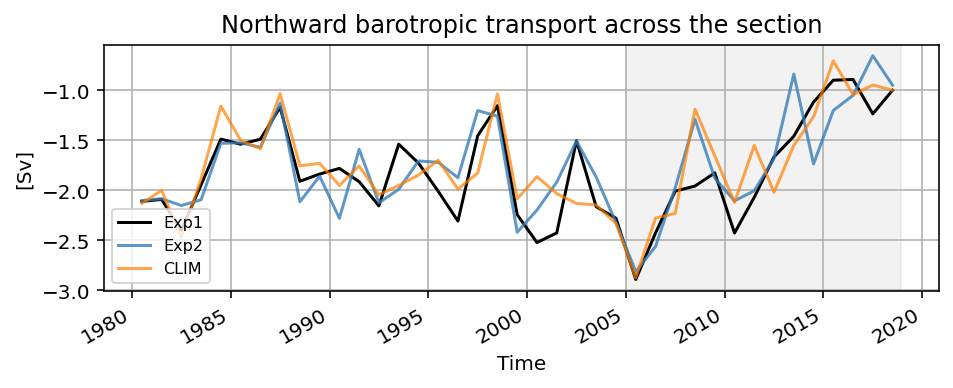

In [8]:
cm = 1/2.54  # centimeters in inches
fig, (ax0) = plt.subplots(1,1,figsize=(19*cm, 5.75*cm), facecolor='none', dpi=72*2, sharex=True)

############-------------  Mean 
# lim1 = -2
# lim2 = 2

(tr_barotrop_v_GAI).plot(ax=ax0, color="k") # positif est vers le sud
(tr_barotrop_v_AI).plot(ax=ax0, color=CB_colors["blue"], alpha = 0.8)  # positif est vers le sud
(tr_barotrop_v_S).plot(ax=ax0, color=CB_colors["orange"],alpha = 0.7)  # positif est vers le sud

ax0.axvspan('2005', '2018-12', color="grey", alpha=0.1)

# ax0.set_ylim(lim1,lim2)
# ax0.set_title('')
ax0.grid()
ax0.legend(["Exp1","Exp2", "CLIM"], loc ='lower left',fontsize=8) 
ax0.set_ylabel('[Sv]')
ax0.set_title('Northward barotropic transport across the section')
ax0.set_xlabel('Time'); 

namo = 'SI_ts_barotropic_transport_sectionGrest_fullsection.jpg'

plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), pad_inches=0.1, bbox_inches='tight') #,edgecolor='none', bbox_inches='tight'
# plt.close(fig)

# vitesse meridionale

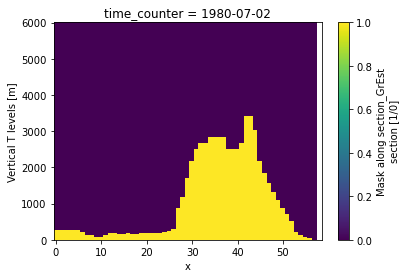

In [5]:
# vnorm = ds.vnorm*100
# vnorm_tmean = vnorm.mean('time_counter')
# fig = plt.figure(figsize=([15,8]),facecolor='none', dpi=72*2)
# vnorm_tmean.isel(deptht=np.arange(i_dep)).plot(yincrease=False) # unit: cm/s
ds_GAI.vomecrty_native
ds_AI.vmask.isel(time_counter=0).plot()

In [5]:
# en cm/s
merid_velo_tmean_GAI = (ds_GAI.vomecrty_native*-100).mean('time_counter')
merid_velo_tmean_AI = (ds_AI.vomecrty_native*-100).mean('time_counter')
merid_velo_tmean_S = (ds_S.vomecrty_native*-100).mean('time_counter')

# DIFF
merid_velo_tmean_GAI_S = merid_velo_tmean_GAI - merid_velo_tmean_S
merid_velo_tmean_GAI_AI = merid_velo_tmean_GAI - merid_velo_tmean_AI
merid_velo_tmean_AI_S = merid_velo_tmean_AI - merid_velo_tmean_S

In [27]:
merid_velo_tmean_GAI = merid_velo_tmean_GAI.assign_coords(nav_lon=("x",ds_GAI.nav_lon.isel(time_counter=0).values))
merid_velo_tmean_GAI.attrs["units"] = 'cm/s'
merid_velo_tmean_GAI.attrs["long_name"] = "Meridionnal velocity"

merid_velo_tmean_GAI_S = merid_velo_tmean_GAI_S.assign_coords(nav_lon=("x",ds_GAI.nav_lon.isel(time_counter=0).values))
merid_velo_tmean_GAI_S.attrs["units"] = 'cm/s'
merid_velo_tmean_GAI_S.attrs["long_name"] = "Meridionnal velocity"

merid_velo_tmean_GAI_AI = merid_velo_tmean_GAI_AI.assign_coords(nav_lon=("x",ds_GAI.nav_lon.isel(time_counter=0).values))
merid_velo_tmean_GAI_AI.attrs["units"] = 'cm/s'
merid_velo_tmean_GAI_AI.attrs["long_name"] = "Meridionnal velocity"

merid_velo_tmean_AI_S = merid_velo_tmean_AI_S.assign_coords(nav_lon=("x",ds_GAI.nav_lon.isel(time_counter=0).values))
merid_velo_tmean_AI_S.attrs["units"] = 'cm/s'
merid_velo_tmean_AI_S.attrs["long_name"] = "Meridionnal velocity"

In [15]:
# fig = plt.figure(figsize=([15,8]),facecolor='none', dpi=72*2)
# merid_velo_tmean_GAI.isel(deptht=np.arange(i_dep)).plot(yincrease=False)
# en cm/s
# bleu: vers le sud

In [29]:
vmask = ds_GAI.vmask.isel(time_counter=0,deptht=np.arange(i_dep))

<xarray.DataArray 'vomecrty_native' (deptht: 75, x: 59)>
dask.array<mean_agg-aggregate, shape=(75, 59), dtype=float32, chunksize=(75, 59), chunktype=numpy.ndarray>
Coordinates:
  * deptht   (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    nav_lon  (x) float32 -19.46 -18.83 -18.51 -18.18 ... 10.22 10.78 9.969e+36
Dimensions without coordinates: x
Attributes:
    units:      cm/s
    long_name:  Meridionnal velocity

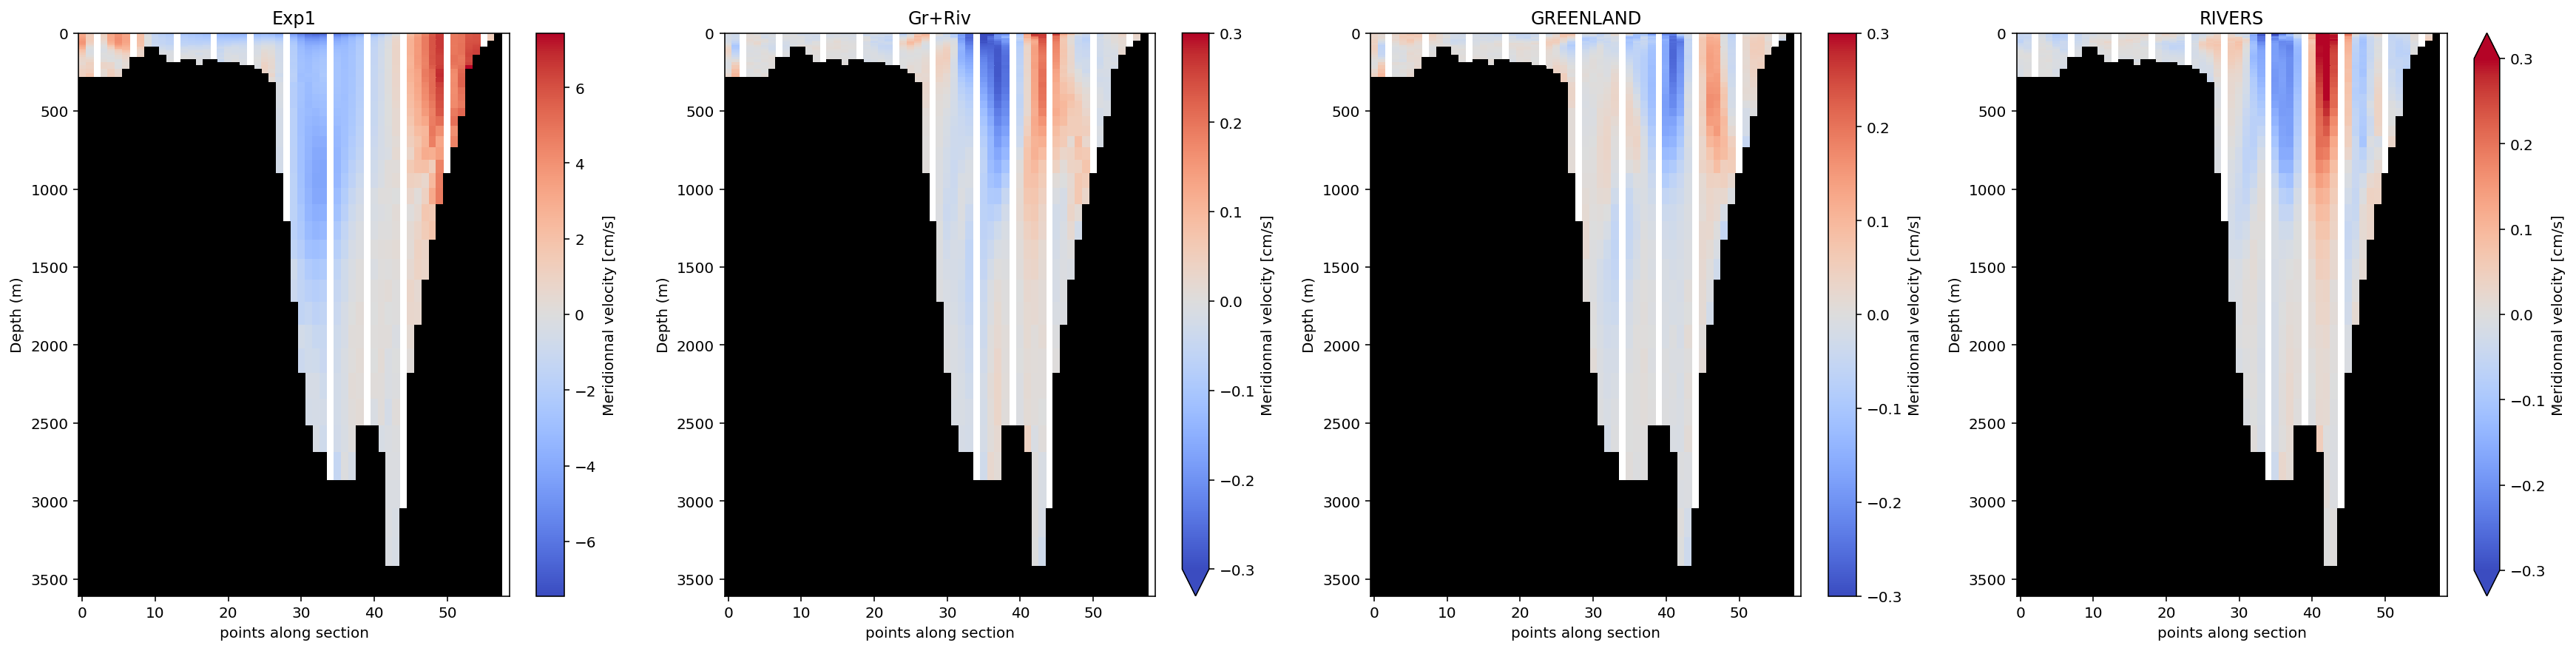

In [34]:
fig, axes = plt.subplots(ncols=4,figsize = (30,7), facecolor='none', dpi=72*2)

##############1
#pcolormesh
merid_velo_tmean_GAI.isel(deptht=np.arange(i_dep)).plot( yincrease=False, ax=axes[0], cmap=plt.cm.coolwarm)
                            #, cbar_kwargs={"orientation": "horizontal"}, vmax=4,vmin=-4) #,x="nav_lon",y="deptht",

#bathy mask
vmask = ds_GAI.vmask.isel(time_counter=0,deptht=np.arange(i_dep))

# axes[0].contour(np.arange(59), vmask.deptht,vmask,1,colors="k",yincrease=False) #nav_lon,nav_lat,
ds_GAI.vmask.isel(time_counter=0,deptht=np.arange(i_dep)).plot(ax=axes[0],yincrease=False,levels=[0,1],colors=['k'],add_colorbar=False) # x="nav_lat",y="deptht",
#                                                                 
axes[0].title.set_text('Exp1')
axes[0].set_xlabel('points along section')
axes[0].set_ylabel('Depth (m)')

# #############2
#pcolormesh
merid_velo_tmean_GAI_S.isel(deptht=np.arange(i_dep)).plot( yincrease=False, ax=axes[1],\
                            cmap=plt.cm.coolwarm,vmax=0.3,vmin=-0.3 )  #cbar_kwargs={"orientation": "horizontal"}

#bathy mask
ds_GAI.vmask.isel(time_counter=0,deptht=np.arange(i_dep)).plot(ax=axes[1],yincrease=False,levels=[0,1],colors=['k'],add_colorbar=False) # x="nav_lat",y="deptht",
#                                                                 
axes[1].title.set_text('Gr+Riv')
axes[1].set_xlabel('points along section')
axes[1].set_ylabel('Depth (m)')

# #############3
#pcolormesh
merid_velo_tmean_GAI_AI.isel(deptht=np.arange(i_dep)).plot( yincrease=False, ax=axes[2],\
                            cmap=plt.cm.coolwarm,vmax=0.3,vmin=-0.3 )  #cbar_kwargs={"orientation": "horizontal"}

#bathy mask
ds_GAI.vmask.isel(time_counter=0,deptht=np.arange(i_dep)).plot(ax=axes[2],yincrease=False,levels=[0,1],colors=['k'],add_colorbar=False) # x="nav_lat",y="deptht",
#                                                                 
axes[2].title.set_text('GREENLAND')
axes[2].set_xlabel('points along section')
axes[2].set_ylabel('Depth (m)')

# #############4
#pcolormesh
merid_velo_tmean_AI_S.isel(deptht=np.arange(i_dep)).plot( yincrease=False, ax=axes[3], \
                            cmap=plt.cm.coolwarm,vmax=0.3,vmin=-0.3 )  #cbar_kwargs={"orientation": "horizontal"}

#bathy mask
ds_GAI.vmask.isel(time_counter=0,deptht=np.arange(i_dep)).plot(ax=axes[3],yincrease=False,levels=[0,1],colors=['k'],add_colorbar=False) # x="nav_lat",y="deptht",
#                                                                 
axes[3].title.set_text('RIVERS')
axes[3].set_xlabel('points along section')
axes[3].set_ylabel('Depth (m)')

namo="meridional_velocity_section_GAI_sensitivities.png"
# fig.tight_layout(pad=0, h_pad=5, w_pad=0) 
plt.show()
# fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none', 
# plt.close(fig)

In [ ]:
le courant vers le nord cotier est plutot le meme dans toutes les simulations. fort surtout dans les 100 premiers metres

# transport barotrope sur la zone encadrée en rouge (près de la cote)

In [17]:
# calcul du transpor dans la zone ci-dessus
# - GAI
e3v_GAI = (ds_GAI.e3v_native*-1).sel(deptht=slice(350)).isel(x=np.arange(9))
e1v_GAI = (ds_GAI.e1v_native*-1).isel(x=np.arange(9))
vitesse_GAI = (ds_GAI.vomecrty_native*-1).sel(deptht=slice(350)).isel(x=np.arange(9)) # m/s

tr_me_GAI = ((((vitesse_GAI*e3v_GAI*e1v_GAI).sum(('deptht','x'))) ) ) / 1e6 # en Sv

#-AI
e3v_AI = (ds_AI.e3v_native*-1).sel(deptht=slice(350)).isel(x=np.arange(9))
e1v_AI = (ds_AI.e1v_native*-1).isel(x=np.arange(9))
vitesse_AI = (ds_AI.vomecrty_native*-1).sel(deptht=slice(350)).isel(x=np.arange(9)) # m/s

tr_me_AI = ((((vitesse_AI*e3v_AI*e1v_AI).sum(('deptht','x'))) ) ) / 1e6 # en Sv

# - S
e3v_S = (ds_S.e3v_native*-1).sel(deptht=slice(350)).isel(x=np.arange(9))
e1v_S = (ds_S.e1v_native*-1).isel(x=np.arange(9))
vitesse_S = (ds_S.vomecrty_native*-1).sel(deptht=slice(350)).isel(x=np.arange(9)) # m/s

tr_me_S = ((((vitesse_S*e3v_S*e1v_S).sum(('deptht','x'))) ) ) / 1e6 # en Sv

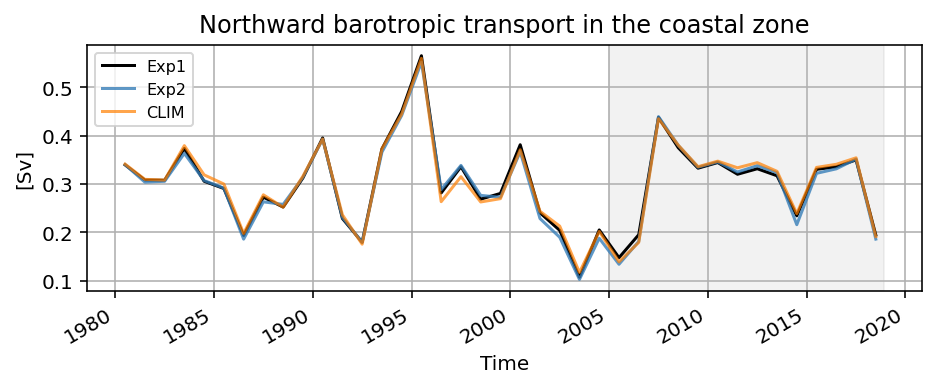

In [22]:
cm = 1/2.54  # centimeters in inches
fig, (ax0) = plt.subplots(1,1,figsize=(19*cm, 5.75*cm), facecolor='none', dpi=72*2, sharex=True)

############-------------  Mean 
# lim1 = -2
# lim2 = 2

(tr_me_GAI).plot(ax=ax0, color="k") # positif est vers le sud
(tr_me_AI).plot(ax=ax0, color=CB_colors["blue"], alpha = 0.8)  # positif est vers le sud
(tr_me_S).plot(ax=ax0, color=CB_colors["orange"],alpha = 0.7)  # positif est vers le sud

ax0.axvspan('2005', '2018-12', color="grey", alpha=0.1)

# ax0.set_ylim(lim1,lim2)
ax0.set_title('')
ax0.grid()
ax0.legend(["Exp1","Exp2", "CLIM"], loc ='upper left',fontsize=8) 
ax0.set_ylabel('[Sv]')
ax0.set_xlabel('Time')

ax0.set_title('Northward barotropic transport in the coastal zone')

namo = 'SI_ts_barotropic_transport_sectionGrest_pres_cote.jpg'
plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), pad_inches=0.1, bbox_inches='tight') #,edgecolor='none', bbox_inches='tight'
# plt.close(fig)

In [16]:
# fig = plt.figure(figsize=([15,8]),facecolor='none', dpi=72*2)
# (ds_GAI.vomecrty_native*-100).mean('time_counter').sel(deptht=slice(350)).isel(x=np.arange(9)).plot(yincrease=False)
# en cm/s
# bleu: vers le sud

# salinité de la section

In [24]:
vosaline_tmean_GAI = (ds_GAI.vosaline).mean('time_counter')
vosaline_tmean_AI = (ds_AI.vosaline).mean('time_counter')
vosaline_tmean_S = (ds_S.vosaline).mean('time_counter')

# DIFF
vosaline_tmean_GAI_S  = vosaline_tmean_GAI - vosaline_tmean_S
vosaline_tmean_GAI_AI = vosaline_tmean_GAI - vosaline_tmean_AI
vosaline_tmean_AI_S   = vosaline_tmean_AI - vosaline_tmean_S

In [25]:
vmask = ds_GAI.vmask.isel(time_counter=0,deptht=np.arange(i_dep))

In [32]:
vosaline_tmean_GAI = vosaline_tmean_GAI.assign_coords(nav_lon=("x",ds_GAI.nav_lon.isel(time_counter=0).values))
vosaline_tmean_GAI.attrs["units"] = '$g~kg^{-1}$'
vosaline_tmean_GAI.attrs["long_name"] = "Salinity"

vosaline_tmean_GAI_S = vosaline_tmean_GAI_S.assign_coords(nav_lon=("x",ds_GAI.nav_lon.isel(time_counter=0).values))
vosaline_tmean_GAI_S.attrs["units"] = '$g~kg^{-1}$'
vosaline_tmean_GAI_S.attrs["long_name"] = "Salinity"

vosaline_tmean_GAI_AI = vosaline_tmean_GAI_AI.assign_coords(nav_lon=("x",ds_GAI.nav_lon.isel(time_counter=0).values))
vosaline_tmean_GAI_AI.attrs["units"] = '$g~kg^{-1}$'
vosaline_tmean_GAI_AI.attrs["long_name"] = "Salinity"

vosaline_tmean_AI_S = vosaline_tmean_AI_S.assign_coords(nav_lon=("x",ds_GAI.nav_lon.isel(time_counter=0).values))
vosaline_tmean_AI_S.attrs["units"] = '$g~kg^{-1}$'
vosaline_tmean_AI_S.attrs["long_name"] = "Salinity"

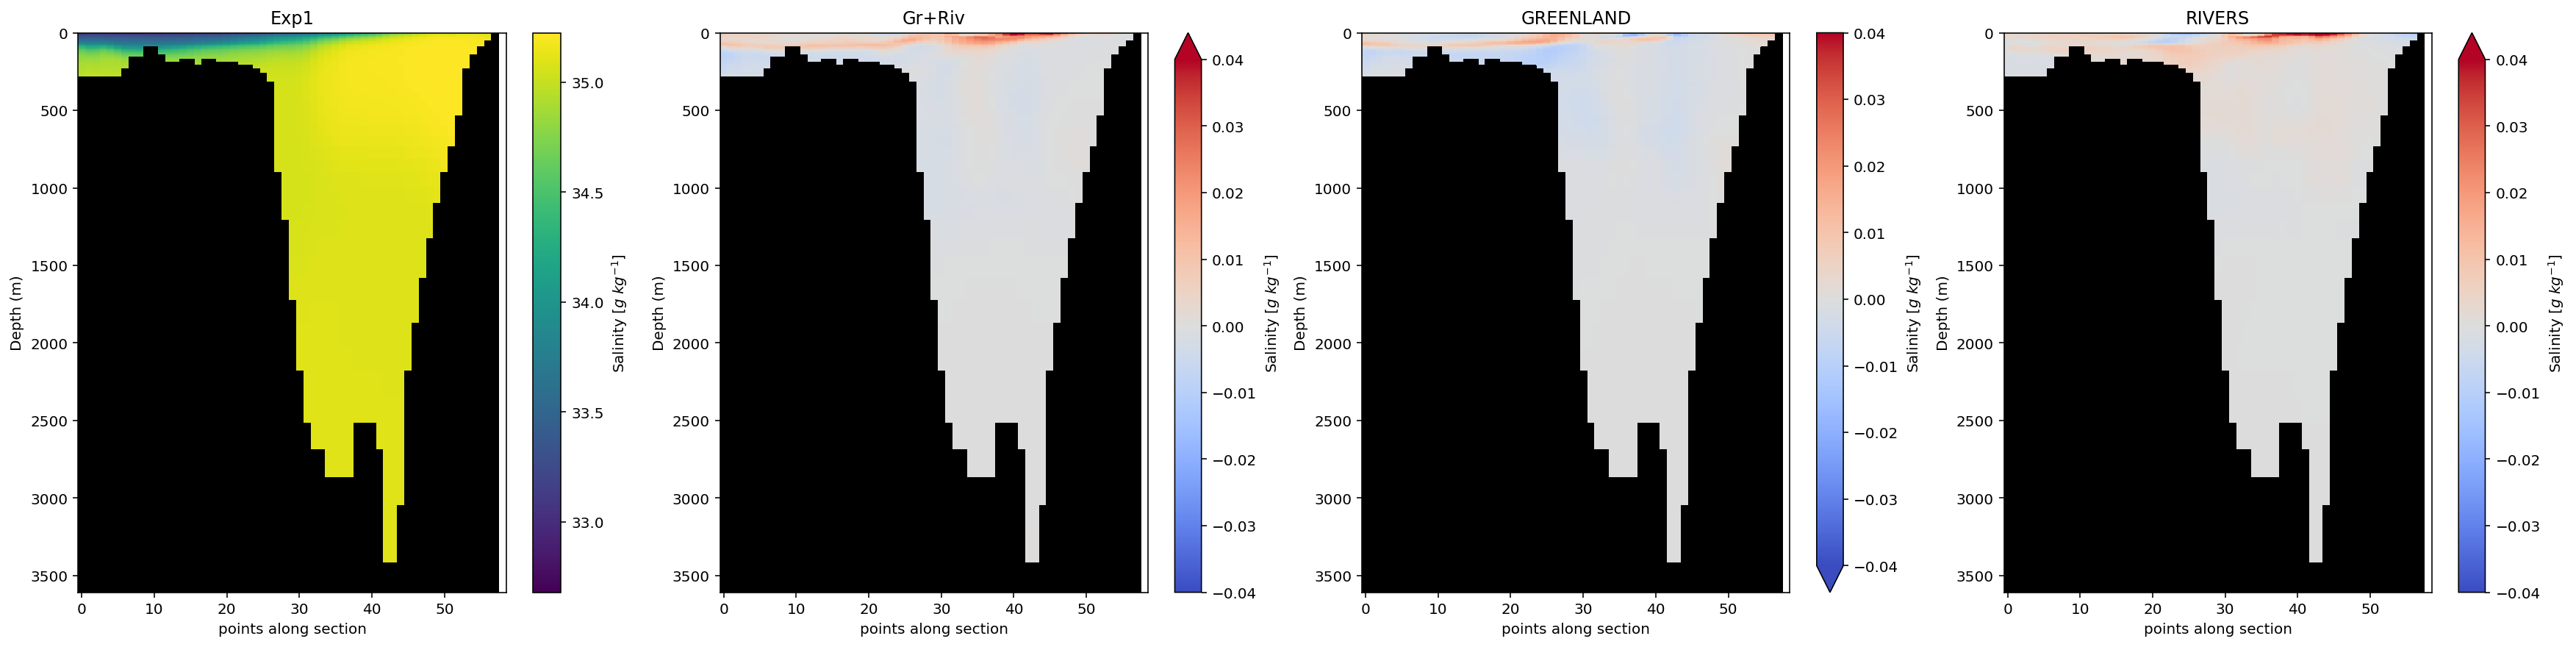

In [34]:
fig, axes = plt.subplots(ncols=4,figsize = (30,7), facecolor='none', dpi=72*2)

##############1
#pcolormesh
vosaline_tmean_GAI.isel(deptht=np.arange(i_dep)).plot( yincrease=False, ax=axes[0])
                            #, cbar_kwargs={"orientation": "horizontal"}, vmax=4,vmin=-4) #,x="nav_lon",y="deptht",

#bathy mask
vmask = ds_GAI.vmask.isel(time_counter=0,deptht=np.arange(i_dep))

# axes[0].contour(np.arange(59), vmask.deptht,vmask,1,colors="k",yincrease=False) #nav_lon,nav_lat,
ds_GAI.vmask.isel(time_counter=0,deptht=np.arange(i_dep)).plot(ax=axes[0],yincrease=False,levels=[0,1],colors=['k'],add_colorbar=False) # x="nav_lat",y="deptht",
#                                                                 
axes[0].title.set_text('Exp1')
axes[0].set_xlabel('points along section')
axes[0].set_ylabel('Depth (m)')

# #############2
#pcolormesh
vosaline_tmean_GAI_S.isel(deptht=np.arange(i_dep)).plot( yincrease=False, ax=axes[1],\
                            cmap=plt.cm.coolwarm,vmax=0.04,vmin=-0.04 )  #cbar_kwargs={"orientation": "horizontal"}

#bathy mask
ds_GAI.vmask.isel(time_counter=0,deptht=np.arange(i_dep)).plot(ax=axes[1],yincrease=False,levels=[0,1],colors=['k'],add_colorbar=False) # x="nav_lat",y="deptht",
#                                                                 
axes[1].title.set_text('Gr+Riv')
axes[1].set_xlabel('points along section')
axes[1].set_ylabel('Depth (m)')

# #############3
#pcolormesh
vosaline_tmean_GAI_AI.isel(deptht=np.arange(i_dep)).plot( yincrease=False, ax=axes[2],\
                            cmap=plt.cm.coolwarm,vmax=0.04,vmin=-0.04)  #cbar_kwargs={"orientation": "horizontal"}

#bathy mask
ds_GAI.vmask.isel(time_counter=0,deptht=np.arange(i_dep)).plot(ax=axes[2],yincrease=False,levels=[0,1],colors=['k'],add_colorbar=False) # x="nav_lat",y="deptht",
#                                                                 
axes[2].title.set_text('GREENLAND')
axes[2].set_xlabel('points along section')
axes[2].set_ylabel('Depth (m)')

# #############4
#pcolormesh
vosaline_tmean_AI_S.isel(deptht=np.arange(i_dep)).plot( yincrease=False, ax=axes[3], \
                            cmap=plt.cm.coolwarm,vmax=0.04,vmin=-0.04)  #cbar_kwargs={"orientation": "horizontal"}

#bathy mask
ds_GAI.vmask.isel(time_counter=0,deptht=np.arange(i_dep)).plot(ax=axes[3],yincrease=False,levels=[0,1],colors=['k'],add_colorbar=False) # x="nav_lat",y="deptht",
#                                                                 
axes[3].title.set_text('RIVERS')
axes[3].set_xlabel('points along section')
axes[3].set_ylabel('Depth (m)')

namo="vosaline_section_GAI_sensitivities.png"
# fig.tight_layout(pad=0, h_pad=5, w_pad=0) 
plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none', 
# plt.close(fig)

# transport de sel le long de la section

In [49]:
# calcul du transpor dans la zone ci-dessus
# GAI
e3v_GAI = (ds_GAI.e3v_native*-1).sel(deptht=slice(350)).isel(x=np.arange(9))
e1v_GAI = (ds_GAI.e1v_native*-1).isel(x=np.arange(9))
vitesse_GAI = (ds_GAI.vomecrty_native*-1).sel(deptht=slice(350)).isel(x=np.arange(9)) # m/s
vosaline_GAI = ds_GAI.vosaline.sel(deptht=slice(350)).isel(x=np.arange(9))

tr_sal_GAI = ((((vitesse_GAI*vosaline_GAI*e3v_GAI*e1v_GAI).sum(('deptht','x'))) ) ) / 1e6 # en Sv

# AI
e3v_AI = (ds_AI.e3v_native*-1).sel(deptht=slice(350)).isel(x=np.arange(9))
e1v_AI = (ds_AI.e1v_native*-1).isel(x=np.arange(9))
vitesse_AI = (ds_AI.vomecrty_native*-1).sel(deptht=slice(350)).isel(x=np.arange(9)) # m/s
vosaline_AI = ds_AI.vosaline.sel(deptht=slice(350)).isel(x=np.arange(9))

tr_sal_AI = ((((vitesse_AI*vosaline_AI*e3v_AI*e1v_AI).sum(('deptht','x'))) ) ) / 1e6 # en Sv

# S
e3v_S = (ds_S.e3v_native*-1).sel(deptht=slice(350)).isel(x=np.arange(9))
e1v_S = (ds_S.e1v_native*-1).isel(x=np.arange(9))
vitesse_S = (ds_S.vomecrty_native*-1).sel(deptht=slice(350)).isel(x=np.arange(9)) # m/s
vosaline_S = ds_S.vosaline.sel(deptht=slice(350)).isel(x=np.arange(9))

tr_sal_S = ((((vitesse_S*vosaline_S*e3v_S*e1v_S).sum(('deptht','x'))) ) ) / 1e6 # en Sv

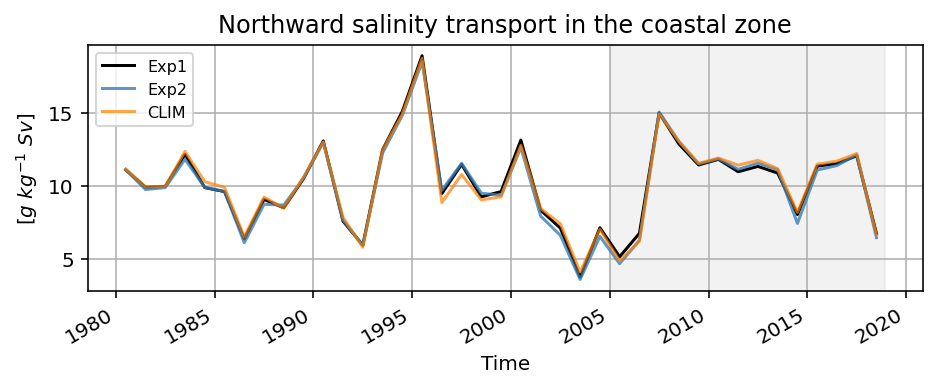

In [54]:
cm = 1/2.54  # centimeters in inches
fig, (ax0) = plt.subplots(1,1,figsize=(19*cm, 5.75*cm), facecolor='none', dpi=72*2, sharex=True)

############-------------  Mean 
# lim1 = -2
# lim2 = 2

(tr_sal_GAI).plot(ax=ax0, color="k") # positif est vers le sud
(tr_sal_AI).plot(ax=ax0, color=CB_colors["blue"], alpha = 0.8)  # positif est vers le sud
(tr_sal_S).plot(ax=ax0, color=CB_colors["orange"],alpha = 0.7)  # positif est vers le sud

ax0.axvspan('2005', '2018-12', color="grey", alpha=0.1)

# ax0.set_ylim(lim1,lim2)
ax0.set_title('')
ax0.grid()
ax0.legend(["Exp1","Exp2", "CLIM"], loc ='upper left',fontsize=8) 
ax0.set_ylabel('[$g~kg^{-1}~Sv$]')
ax0.set_xlabel('Time')

ax0.set_title('Northward salinity transport in the coastal zone')

namo = 'SI_ts_salinity_transport_sectionGrest_pres_cote.jpg'
plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), pad_inches=0.1, bbox_inches='tight') #,edgecolor='none', bbox_inches='tight'
# plt.close(fig)

# transport en salinity le long de toute la section

In [60]:
# calcul du transpor dans la zone ci-dessus
# GAI
e3v_GAI = (ds_GAI.e3v_native*-1)
e1v_GAI = (ds_GAI.e1v_native*-1)
vitesse_GAI = (ds_GAI.vomecrty_native*-1)# m/s
vosaline_GAI = ds_GAI.vosaline

tr_sal_GAI = ((((vitesse_GAI*vosaline_GAI*e3v_GAI*e1v_GAI).sum(('deptht','x'))) ) ) / 1e6 # en Sv

# AI
e3v_AI = (ds_AI.e3v_native*-1)
e1v_AI = (ds_AI.e1v_native*-1)
vitesse_AI = (ds_AI.vomecrty_native*-1)# m/s
vosaline_AI = ds_AI.vosaline

tr_sal_AI = ((((vitesse_AI*vosaline_AI*e3v_AI*e1v_AI).sum(('deptht','x'))) ) ) / 1e6 # en Sv

# S
e3v_S = (ds_S.e3v_native*-1)
e1v_S = (ds_S.e1v_native*-1)
vitesse_S = (ds_S.vomecrty_native*-1) # m/s
vosaline_S = ds_S.vosaline

tr_sal_S = ((((vitesse_S*vosaline_S*e3v_S*e1v_S).sum(('deptht','x'))) ) ) / 1e6 # en Sv

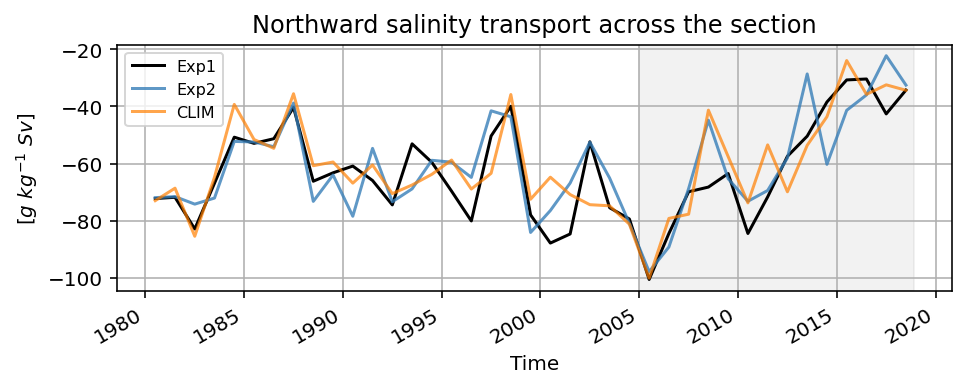

In [62]:
cm = 1/2.54  # centimeters in inches
fig, (ax0) = plt.subplots(1,1,figsize=(19*cm, 5.75*cm), facecolor='none', dpi=72*2, sharex=True)

############-------------  Mean 
# lim1 = -2
# lim2 = 2

(tr_sal_GAI).plot(ax=ax0, color="k") # positif est vers le sud
(tr_sal_AI).plot(ax=ax0, color=CB_colors["blue"], alpha = 0.8)  # positif est vers le sud
(tr_sal_S).plot(ax=ax0, color=CB_colors["orange"],alpha = 0.7)  # positif est vers le sud

ax0.axvspan('2005', '2018-12', color="grey", alpha=0.1)

# ax0.set_ylim(lim1,lim2)
ax0.set_title('')
ax0.grid()
ax0.legend(["Exp1","Exp2", "CLIM"], loc ='upper left',fontsize=8) 
ax0.set_ylabel('[$g~kg^{-1}~Sv$]')
ax0.set_xlabel('Time')

ax0.set_title('Northward salinity transport across the section')

namo = 'SI_ts_salinity_transport_sectionGrest.jpg'
plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), pad_inches=0.1, bbox_inches='tight') #,edgecolor='none', bbox_inches='tight'
# plt.close(fig)